# Import Libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings("ignore")
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# reading and combining data

In [294]:
Sample_Submission = pd.read_csv('Sample_Submission.csv')

In [295]:
X_test = pd.read_csv('test.csv')

In [296]:
train_data = pd.read_csv('train.csv')

In [297]:
Sample_Submission.head()

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


In [298]:
Sample_Submission.dtypes

ID                   object
Time_taken (min)    float64
dtype: object

In [299]:
Sample_Submission.shape

(11399, 2)

In [300]:
X_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [301]:
X_test.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
dtype: object

In [302]:
X_test.shape

(11399, 19)

In [303]:
X_test.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City'],
      dtype='object')

In [304]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [305]:
train_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [306]:
train_data.shape

(45593, 20)

In [307]:
test_data = pd.merge(X_test, Sample_Submission, on='ID', how='inner')

In [308]:
test_data.shape

(11399, 20)

In [309]:
test_data.rename(columns={'Time_taken (min)': 'time_taken'}, inplace=True)
train_data.rename(columns={'Time_taken(min)': 'time_taken'}, inplace=True)

In [310]:
test_data['time_taken'] = test_data['time_taken'].round().astype('int')

In [311]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,26
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,28
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,27
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,28
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,21


In [312]:
train_data['time_taken'] = train_data['time_taken'].str.split().str[1].astype(int)

In [313]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [314]:
data = pd.concat([test_data,train_data] , axis = 0 , ignore_index = True)

# Data Cleaning

In [315]:
data.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)

In [316]:
data.shape

(56992, 20)

In [317]:
data.time_taken.describe()

count    56992.000000
mean        26.283391
std          9.197646
min         10.000000
25%         19.000000
50%         25.000000
75%         32.000000
max         54.000000
Name: time_taken, dtype: float64

In [318]:
data.loc[0, 'Delivery_person_Age']

'NaN '

In [319]:
data.replace('NaN ', np.nan, inplace=True)

In [320]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            2345
Delivery_person_Ratings        2415
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    2175
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density            755
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries            1231
Festival                        293
City                           1524
time_taken                        0
dtype: int64

In [321]:
data.dropna( inplace = True)

In [322]:
data.shape

(51659, 20)

In [323]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
time_taken                     0
dtype: int64

In [324]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
time_taken                       int32
dtype: object

In [325]:
data['Delivery_person_Age'] = data['Delivery_person_Age'].astype('int')
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype('float')
data['multiple_deliveries'] = data['multiple_deliveries'].astype('int')
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%H:%M:%S')

In [326]:
data.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                     int32
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                             object
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weather_conditions                     object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int32
Festival                               object
City                                   object
time_taken                              int32
dtype: object

In [327]:
def calculate_dictance(data):
    restaurant_coordinate = (data['Restaurant_latitude'], data['Restaurant_longitude'])
    home_coordinate = (data['Delivery_location_latitude'], data['Delivery_location_longitude'])
    distance = geodesic(restaurant_coordinate, home_coordinate).kilometers
    return distance

data['Delivery_Distance'] = data.apply(calculate_dictance, axis=1)

In [328]:
def calculate_preparation_time(data):
    Preparation_Time = data['Time_Order_picked'] - data['Time_Orderd']
    return Preparation_Time

data['Preparation_Time'] = data.apply(calculate_preparation_time, axis=1)

In [329]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken,Delivery_Distance,Preparation_Time
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,1900-01-01 20:30:00,...,Jam,0,Snack,motorcycle,1,No,Metropolitian,28,17.042985,0 days 00:05:00
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,1900-01-01 19:35:00,...,Jam,0,Drinks,motorcycle,1,No,Metropolitian,27,13.390474,0 days 00:10:00
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,1900-01-01 17:15:00,...,Medium,1,Meal,scooter,1,No,Metropolitian,28,13.397932,0 days 00:05:00
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,1900-01-01 18:25:00,...,Medium,2,Drinks,scooter,1,No,Metropolitian,21,17.042634,0 days 00:15:00
5,0xc4af,GOARES04DEL01,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,1900-01-01 09:45:00,...,Low,0,Drinks,motorcycle,1,No,Metropolitian,21,1.541060,0 days 00:10:00


In [330]:
data['Preparation_Time'] = data['Preparation_Time'].dt.components['minutes']

In [331]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken,Delivery_Distance,Preparation_Time
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,1900-01-01 20:30:00,...,Jam,0,Snack,motorcycle,1,No,Metropolitian,28,17.042985,5
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,1900-01-01 19:35:00,...,Jam,0,Drinks,motorcycle,1,No,Metropolitian,27,13.390474,10
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,1900-01-01 17:15:00,...,Medium,1,Meal,scooter,1,No,Metropolitian,28,13.397932,5
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,1900-01-01 18:25:00,...,Medium,2,Drinks,scooter,1,No,Metropolitian,21,17.042634,15
5,0xc4af,GOARES04DEL01,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,1900-01-01 09:45:00,...,Low,0,Drinks,motorcycle,1,No,Metropolitian,21,1.541060,10


In [332]:
data.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                     int32
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                             object
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weather_conditions                     object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int32
Festival                               object
City                                   object
time_taken                              int32
Delivery_Distance                     float64
Preparation_Time                  

# Removing useless values

In [333]:
data.Festival.value_counts()

No      50630
Yes      1029
Name: Festival, dtype: int64

In [334]:
data.drop(columns = ['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Festival'] , inplace = True)

In [335]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,time_taken,Delivery_Distance,Preparation_Time
1,28,4.6,conditions Windy,Jam,0,Snack,motorcycle,1,Metropolitian,28,17.042985,5
2,23,4.5,conditions Stormy,Jam,0,Drinks,motorcycle,1,Metropolitian,27,13.390474,10
3,21,4.8,conditions Fog,Medium,1,Meal,scooter,1,Metropolitian,28,13.397932,5
4,31,4.6,conditions Sunny,Medium,2,Drinks,scooter,1,Metropolitian,21,17.042634,15
5,26,4.7,conditions Fog,Low,0,Drinks,motorcycle,1,Metropolitian,21,1.541060,10


In [336]:
data['Preparation_Time'].value_counts()

5     17248
15    17240
10    17171
Name: Preparation_Time, dtype: int64

In [337]:
data['City'].value_counts()

Metropolitian     39716
Urban             11746
Semi-Urban          197
Name: City, dtype: int64

In [338]:
data = data[data["City"] != "Semi-Urban "]

In [339]:
data.shape

(51462, 12)

In [340]:
data.replace('electric_scooter ', 'scooter ', inplace=True)

In [341]:
data.Type_of_vehicle.value_counts()

motorcycle     30182
scooter        21280
Name: Type_of_vehicle, dtype: int64

In [342]:
data.dtypes

Delivery_person_Age          int32
Delivery_person_Ratings    float64
Weather_conditions          object
Road_traffic_density        object
Vehicle_condition            int64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries          int32
City                        object
time_taken                   int32
Delivery_Distance          float64
Preparation_Time             int64
dtype: object

# EDA

In [343]:
data.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,time_taken,Delivery_Distance,Preparation_Time
Delivery_person_Age,1.000000,-0.111108,0.001063,0.113737,0.300781,0.004298,-0.006826
Delivery_person_Ratings,-0.111108,1.000000,0.043421,-0.125004,-0.370809,-0.002715,0.006331
Vehicle_condition,0.001063,0.043421,1.000000,-0.101523,-0.245201,0.001442,0.004131
multiple_deliveries,0.113737,-0.125004,-0.101523,1.000000,0.388844,0.003633,-0.005474
time_taken,0.300781,-0.370809,-0.245201,0.388844,1.000000,0.003512,-0.005386
Delivery_Distance,0.004298,-0.002715,0.001442,0.003633,0.003512,1.000000,-0.002811
Preparation_Time,-0.006826,0.006331,0.004131,-0.005474,-0.005386,-0.002811,1.000000


<Axes: xlabel='count', ylabel='Weather_conditions'>

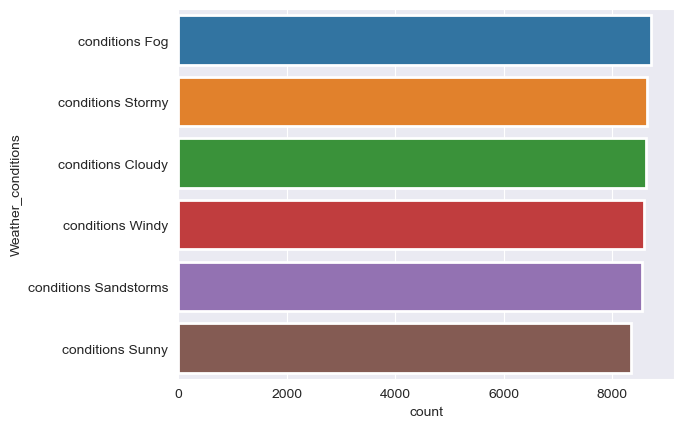

In [344]:
sns.set_style('darkgrid')
sns.countplot(y = 'Weather_conditions', data = data, order = data['Weather_conditions'].value_counts().index, lw =2)

Low        17472
Jam        16225
Medium     12656
High        5109
Name: Road_traffic_density, dtype: int64


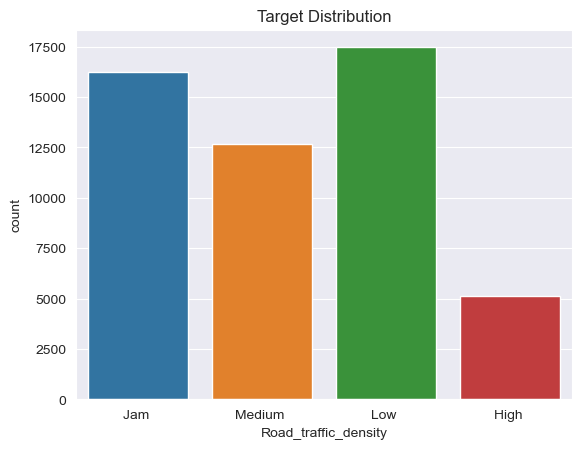

In [345]:
print(data.Road_traffic_density.value_counts())
sns.countplot(x = data.Road_traffic_density);
plt.title("Target Distribution")
plt.show()

<Axes: xlabel='City', ylabel='count'>

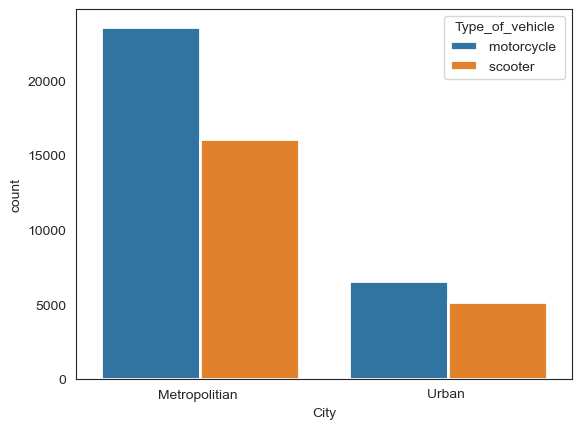

In [346]:
sns.set_style('white')
sns.countplot(x = 'City', hue = 'Type_of_vehicle', data = data, order = data['City'].value_counts().index, lw = 2)

<Axes: xlabel='Type_of_order', ylabel='count'>

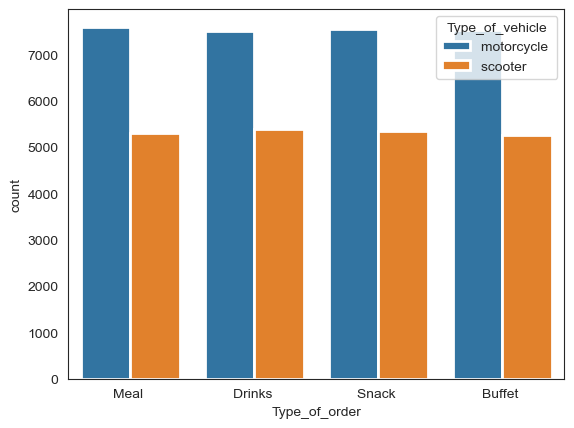

In [347]:
sns.set_style('white')
sns.countplot(x = 'Type_of_order', hue = 'Type_of_vehicle', data = data, order = data['Type_of_order'].value_counts().index, lw = 2)

<Axes: ylabel='multiple_deliveries'>

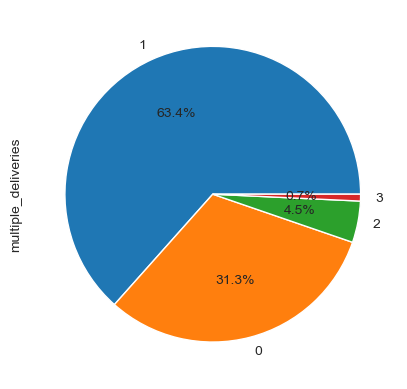

In [348]:
data['multiple_deliveries'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='City', ylabel='count'>

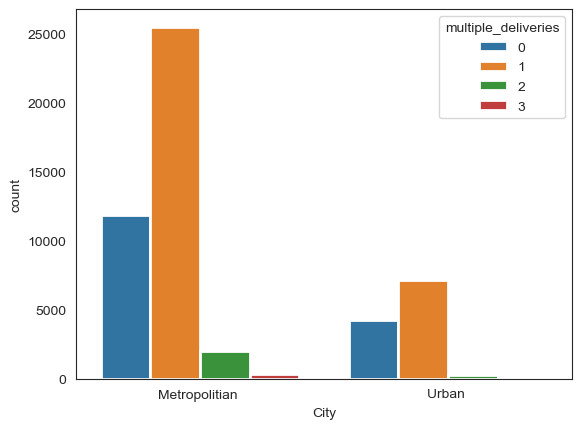

In [349]:
sns.set_style('white')
sns.countplot(x = 'City', hue = 'multiple_deliveries', data = data, order = data['City'].value_counts().index, lw = 2)

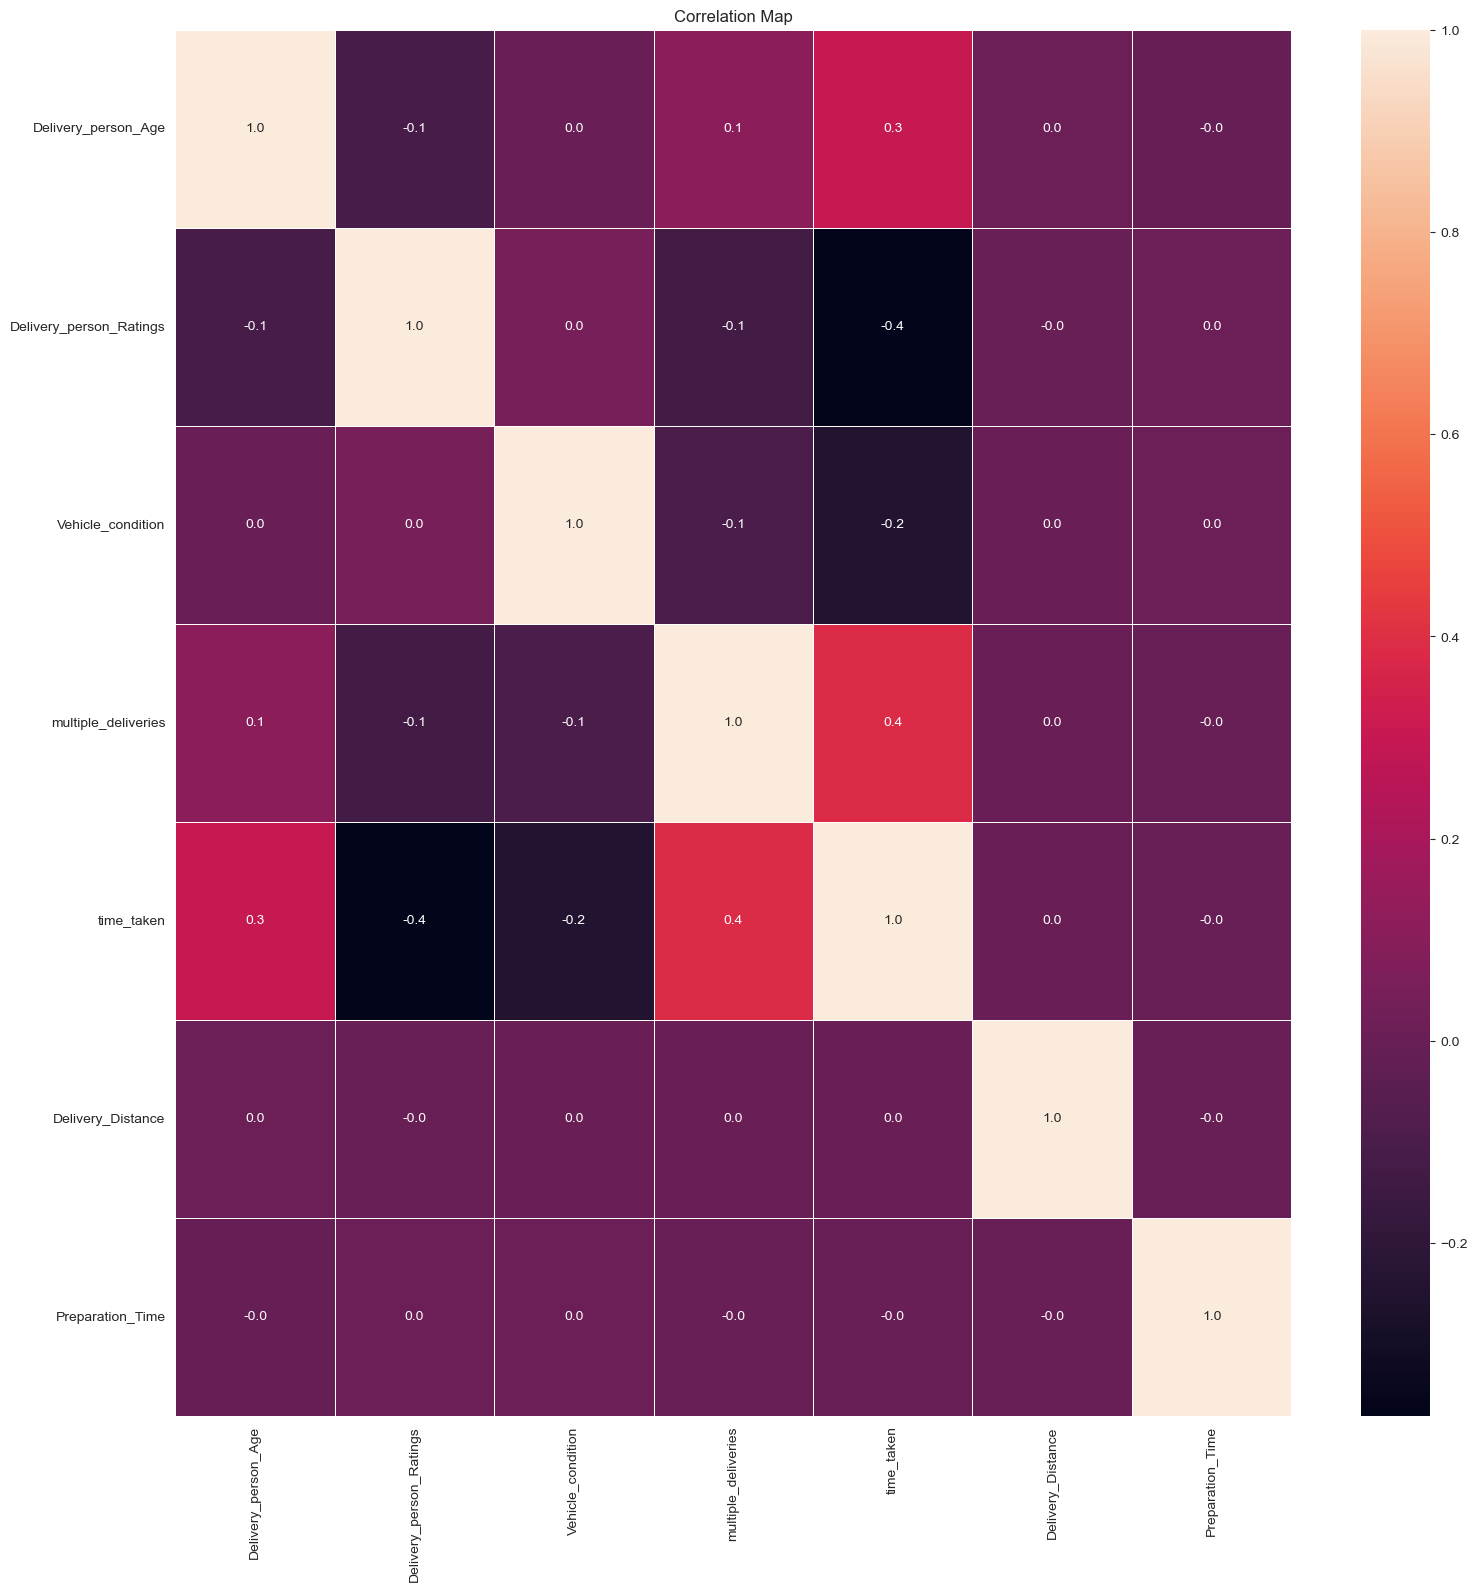

In [350]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

# Encoding

In [351]:
data['Type_of_vehicle'].replace(["motorcycle ","scooter "],[1,0], inplace = True)
data['City'].replace(["Metropolitian ","Urban "],[1,0], inplace = True)

In [352]:
data['Type_of_vehicle'].value_counts()

1    30182
0    21280
Name: Type_of_vehicle, dtype: int64

In [353]:
data['City'].value_counts()

1    39716
0    11746
Name: City, dtype: int64

In [354]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,time_taken,Delivery_Distance,Preparation_Time
1,28,4.6,conditions Windy,Jam,0,Snack,1,1,1,28,17.042985,5
2,23,4.5,conditions Stormy,Jam,0,Drinks,1,1,1,27,13.390474,10
3,21,4.8,conditions Fog,Medium,1,Meal,0,1,1,28,13.397932,5
4,31,4.6,conditions Sunny,Medium,2,Drinks,0,1,1,21,17.042634,15
5,26,4.7,conditions Fog,Low,0,Drinks,1,1,1,21,1.541060,10


In [355]:
X = data.drop(['time_taken'] , axis = 1)
y = data['time_taken']

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [357]:
X_train.shape , X_test.shape

((36023, 11), (15439, 11))

In [358]:
ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',
                             variables=['Weather_conditions', 'Road_traffic_density', 'Type_of_order'])

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Weather_conditions', 'Road_traffic_density',
                          'Type_of_order'])

In [359]:
train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

In [360]:
train_t.dtypes

Delivery_person_Age          int32
Delivery_person_Ratings    float64
Weather_conditions           int64
Road_traffic_density         int64
Vehicle_condition            int64
Type_of_order                int64
Type_of_vehicle              int64
multiple_deliveries          int32
City                         int64
Delivery_Distance          float64
Preparation_Time             int64
dtype: object

In [361]:
train_t.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Delivery_Distance,Preparation_Time
9345,24,4.8,0,0,1,0,1,1,1,4.589054,10
9199,28,4.6,1,1,2,1,0,0,0,7.556231,10
44316,35,4.9,1,1,2,2,1,1,1,13.563367,10
47982,33,4.6,0,2,0,2,1,0,1,6.205443,15
4428,37,5.0,2,2,1,2,0,1,1,6.118144,10


# Outlier Removing 

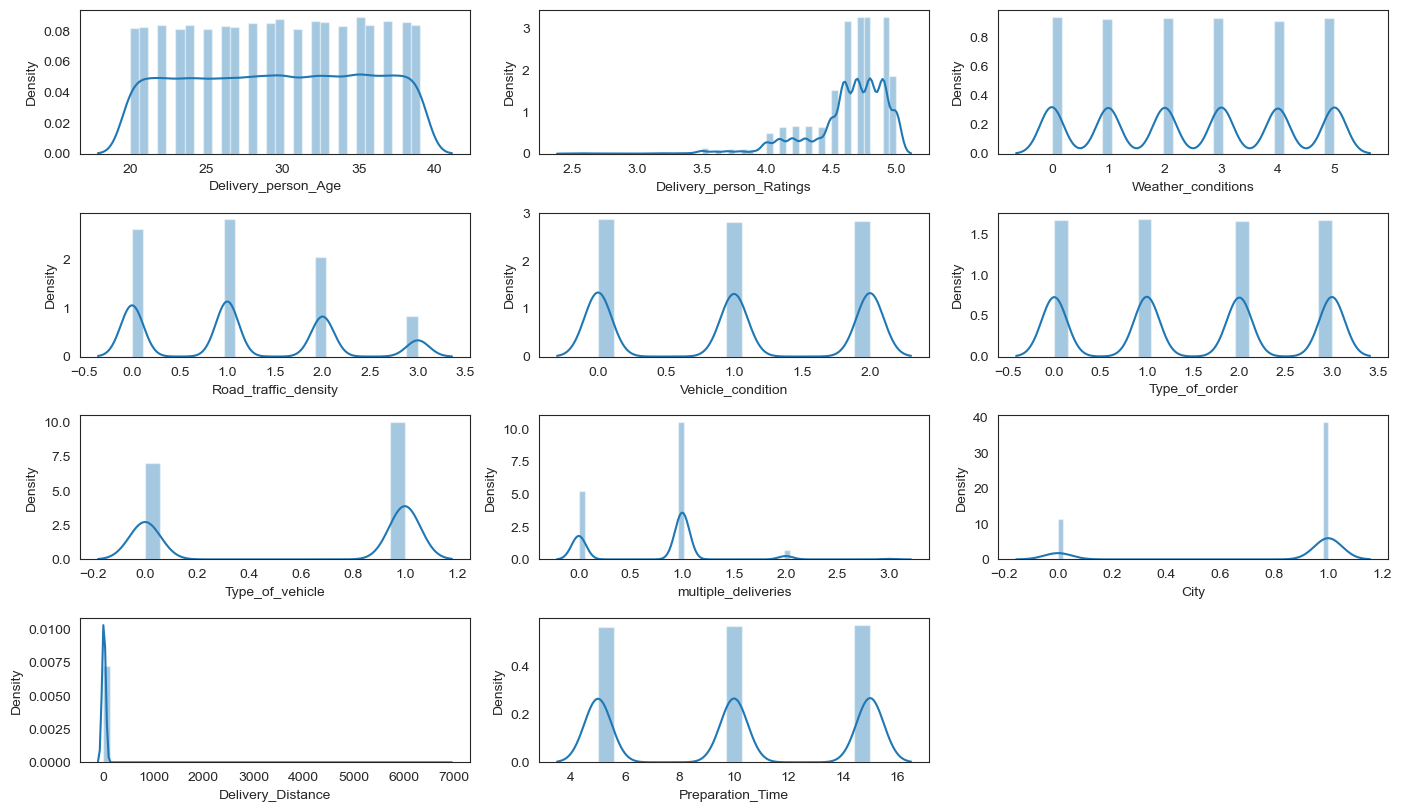

In [362]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in train_t:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(train_t[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [392]:
def plot_hist(data, col):
    plt.figure(figsize=(6, 3))
    plt.hist(data[col], bins=30)
    plt.title("Distribution of " + col)
    return plt.show()

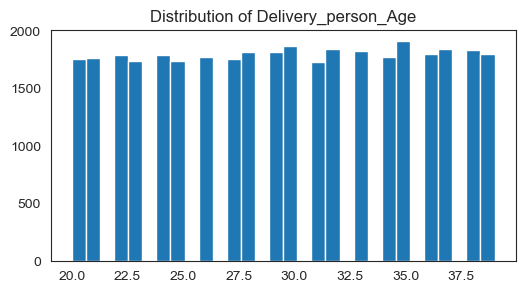

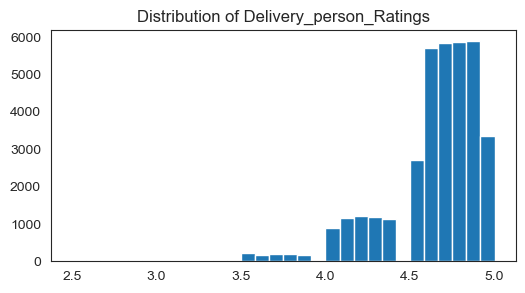

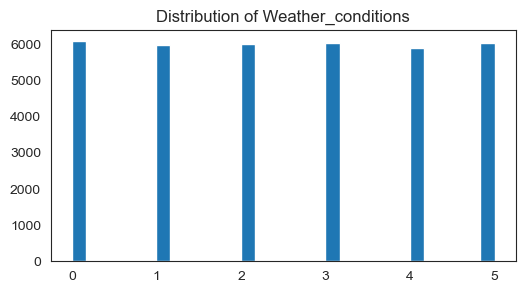

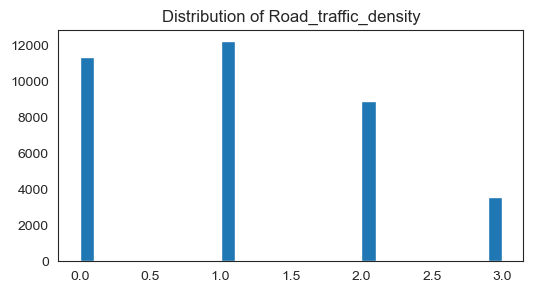

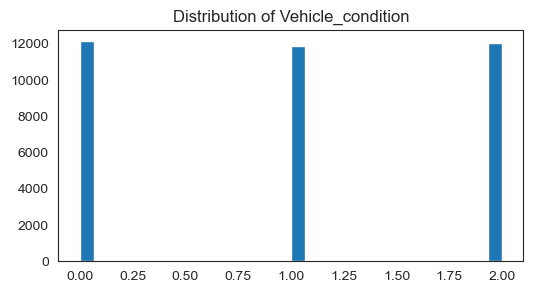

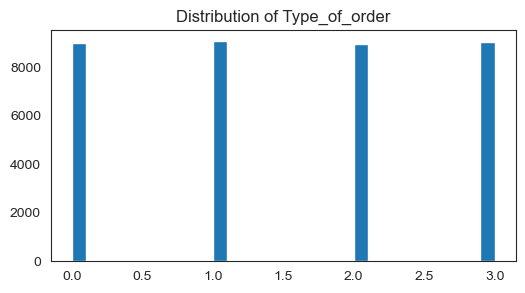

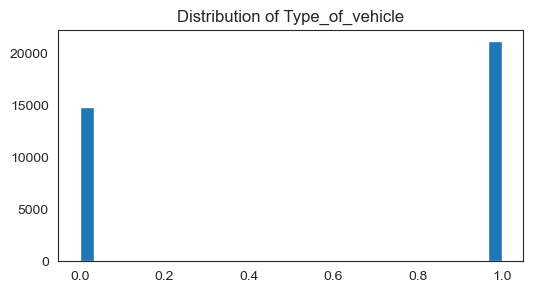

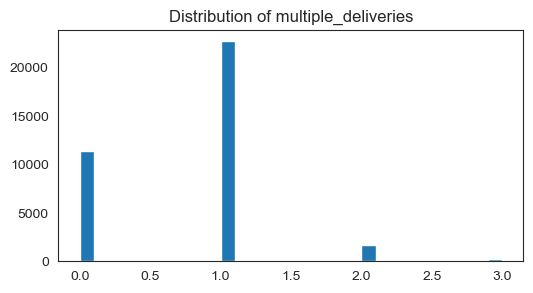

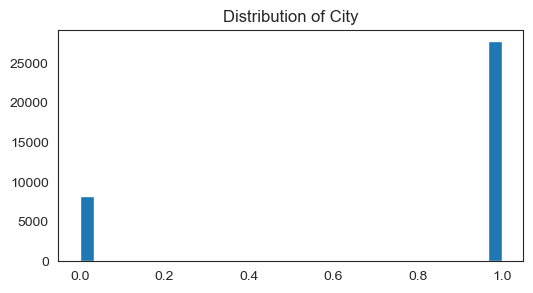

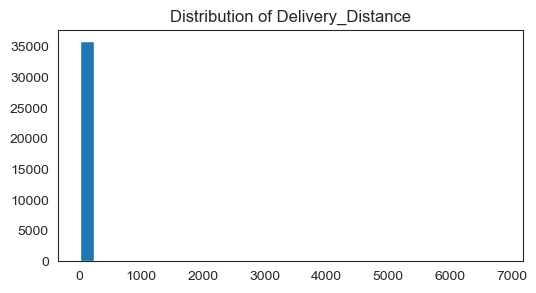

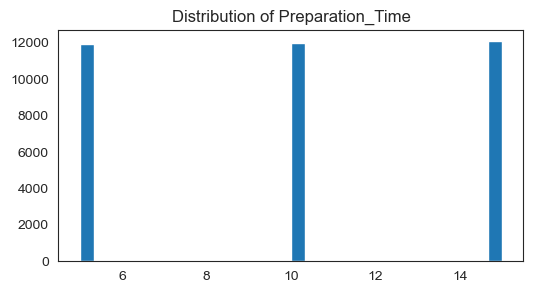

In [393]:
for i in train_t:
    plot_hist(train_t,i)

In [394]:
trimmer = OutlierTrimmer(
    fold = 1.4 , capping_method='iqr', tail='left', variables = ['Delivery_person_Ratings'])

trimmer.fit(train_t)

OutlierTrimmer(capping_method='iqr', fold=1.4, tail='left',
               variables=['Delivery_person_Ratings'])

In [395]:
train_t1 = trimmer.transform(train_t)
test_t1 = trimmer.transform(test_t)

In [396]:
train_t.shape, train_t1.shape

((36023, 11), (34910, 11))

In [397]:
test_t1.shape

(14914, 11)

In [398]:
trimmer = OutlierTrimmer(
    fold = 1.5 , capping_method='iqr', tail='right', variables = ['multiple_deliveries'])

trimmer.fit(train_t1)

OutlierTrimmer(capping_method='iqr', fold=1.5,
               variables=['multiple_deliveries'])

In [399]:
train_t2 = trimmer.transform(train_t1)
test_t2 = trimmer.transform(test_t1)

In [400]:
print("train data shape before removing outliers:", train_t.shape)
print("test data shape before removing outliers:", train_t2.shape)

train data shape before removing outliers: (36023, 11)
test data shape before removing outliers: (34667, 11)


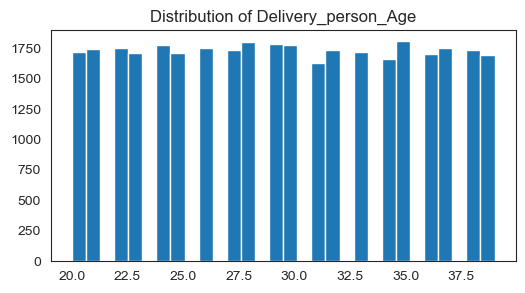

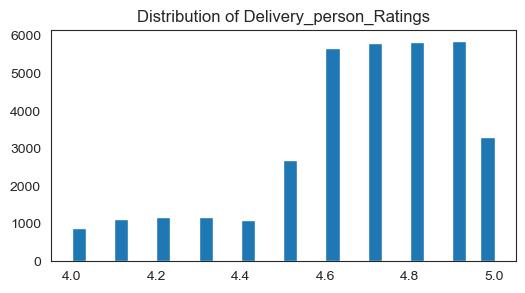

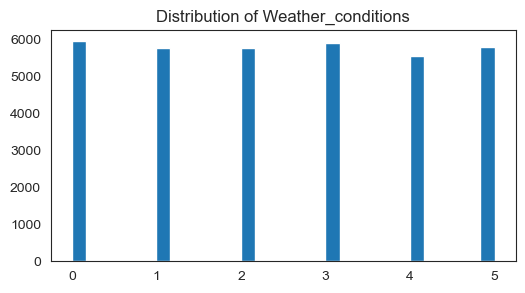

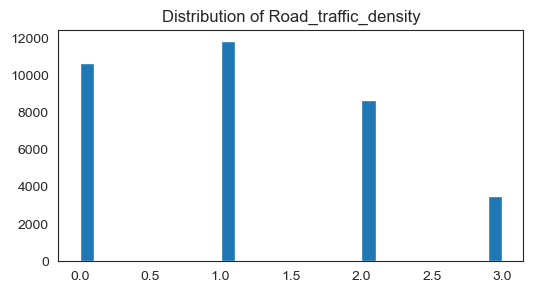

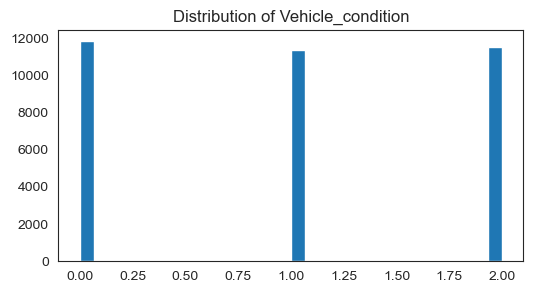

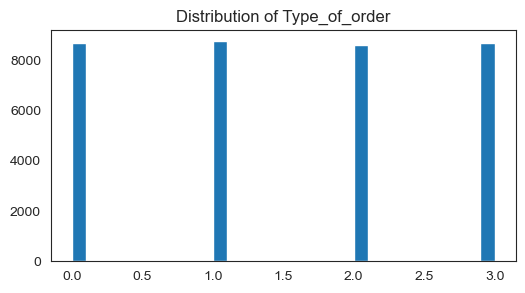

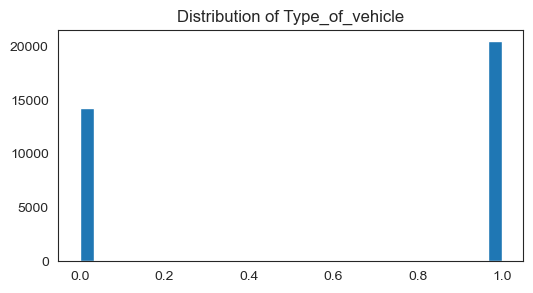

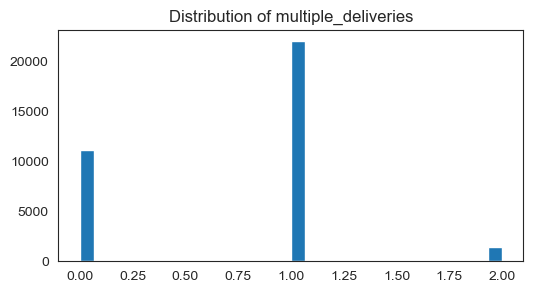

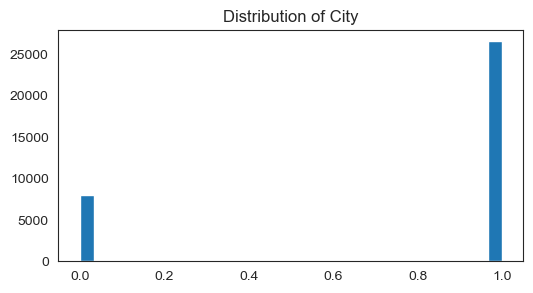

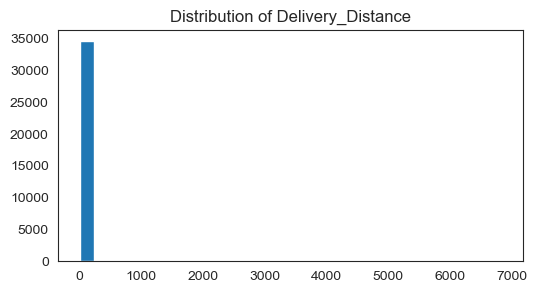

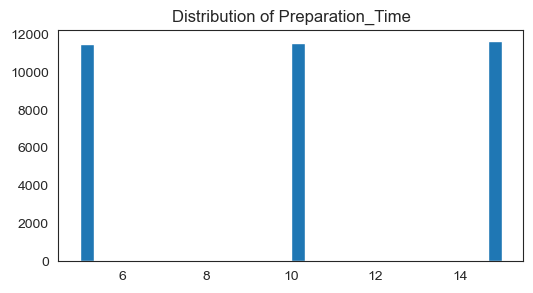

In [401]:
for i in train_t2:
    plot_hist(train_t2,i)

In [402]:
y_train = y_train[y_train.index.isin(train_t2.index)]
y_train.shape
y_test = y_test[y_test.index.isin(test_t2.index)]

# PERFORMING FEATURE SCALING

In [403]:
scaler = MinMaxScaler()
scaler.fit(train_t2)
train_t2_scaled = scaler.transform(train_t2)
test_t2_scaled = scaler.transform(test_t2)

In [404]:
train_t2_scaled = pd.DataFrame(train_t2_scaled, columns=train_t2.columns)
test_t2_scaled = pd.DataFrame(test_t2_scaled, columns=test_t2.columns)

In [405]:
train_t2_scaled.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Delivery_Distance,Preparation_Time
0,0.210526,0.8,0.0,0.000000,0.5,0.000000,1.0,0.5,1.0,0.000456,0.5
1,0.421053,0.6,0.2,0.333333,1.0,0.333333,0.0,0.0,0.0,0.000889,0.5
2,0.789474,0.9,0.2,0.333333,1.0,0.666667,1.0,0.5,1.0,0.001766,0.5
3,0.684211,0.6,0.0,0.666667,0.0,0.666667,1.0,0.0,1.0,0.000692,1.0
4,0.894737,1.0,0.4,0.666667,0.5,0.666667,0.0,0.5,1.0,0.000679,0.5


In [406]:
train_t2_scaled.shape

(34667, 11)

# Modelling

# Linear Regression

In [427]:
lr = LinearRegression()
start_time = time.time()
lr.fit(train_t2_scaled, y_train)
end_time = time.time()

In [428]:
training_time = end_time - start_time

In [429]:
y_pred = lr.predict(test_t2_scaled)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

In [430]:
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")
print("Mean Absolute Error :",MAE)
print("Mean Squared Error :",MSE)
print("Training time:", training_time, "seconds")

R2 Score is : 34.5 %
Mean Absolute Error : 5.750804184105783
Mean Squared Error : 51.754976610394486
Training time: 0.028616905212402344 seconds


# K-Nearest Neighbors(KNN) Regressor

In [431]:
neigh = KNeighborsRegressor(n_neighbors=8)
start_time = time.time()
neigh.fit(train_t2_scaled, y_train)
end_time = time.time()

In [432]:
knn_training_time = end_time - start_time

In [433]:
y_pred1 = neigh.predict(test_t2_scaled)

In [434]:
print("R2 Score is :",round(r2_score(y_test,y_pred1),3)*100,"%")
print("Mean Absolute Error :",mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error :",mean_squared_error(y_test, y_pred1))
print("Training time:", knn_training_time, "seconds")

R2 Score is : 52.6 %
Mean Absolute Error : 4.694577702702703
Mean Squared Error : 37.423279138513514
Training time: 0.26750612258911133 seconds


# Let's check our model with train data

In [435]:
y_pred2 = neigh.predict(train_t2_scaled)

In [436]:
print("R2 Score is :",round(r2_score(y_train,y_pred2),3)*100,"%")

R2 Score is : 63.9 %
